# About this Dataset
Context: This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years of age of Pima Indian heritage.

Content: The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


In [5]:
!pip install nest_asyncio

In [1]:
import pandas as pd
import aiohttp
import nest_asyncio

# Apply nest_asyncio to enable asyncio in Colab
nest_asyncio.apply()

In [2]:
async def download(url, filename):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            if response.status == 200:
                with open(filename, "wb") as f:
                    while True:
                        chunk = await response.content.read(1024)
                        if not chunk:
                            break
                        f.write(chunk)

async def main():
    filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/diabetes.csv"
    await download(filename, "diabetes.csv")
    df = pd.read_csv("diabetes.csv")
    return df  # Return the DataFrame from main()

if __name__ == "__main__":
    import asyncio  # Import asyncio here
    df = asyncio.run(main())  # Assign the returned DataFrame to df
    print(df.head())  # Now df is accessible in the global scope

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
df.shape

(768, 9)

# Statistical Overview of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Use the 'describe()' method to compute and display descriptive statistics

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Check for missing data and create a Boolean DataFrame
missing_data = df.isnull()

# Display the first 5 rows of the 'missing_data' DataFrame
print(missing_data.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0        False    False          False          False    False  False   
1        False    False          False          False    False  False   
2        False    False          False          False    False  False   
3        False    False          False          False    False  False   
4        False    False          False          False    False  False   

   DiabetesPedigreeFunction    Age  Outcome  
0                     False  False    False  
1                     False  False    False  
2                     False  False    False  
3                     False  False    False  
4                     False  False    False  


In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Pregnancies
False    768
Name: Pregnancies, dtype: int64

Glucose
False    768
Name: Glucose, dtype: int64

BloodPressure
False    768
Name: BloodPressure, dtype: int64

SkinThickness
False    768
Name: SkinThickness, dtype: int64

Insulin
False    768
Name: Insulin, dtype: int64

BMI
False    768
Name: BMI, dtype: int64

DiabetesPedigreeFunction
False    768
Name: DiabetesPedigreeFunction, dtype: int64

Age
False    768
Name: Age, dtype: int64

Outcome
False    768
Name: Outcome, dtype: int64



In [9]:
# Get the data types of each column in the DataFrame
column_data_types = df.dtypes

# Print the data types
print(column_data_types)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


# Visualization

In [10]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

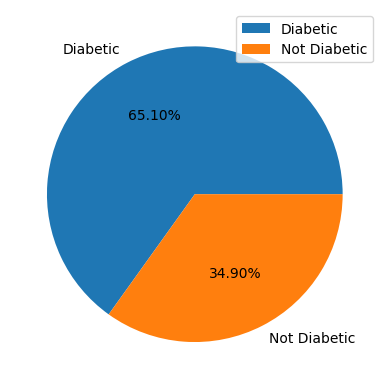

In [12]:
# Define labels for the pie chart
labels = 'Diabetic', 'Not Diabetic'

# Create a pie chart based on the 'Outcome' column
plt.pie(df['Outcome'].value_counts(), labels=labels, autopct='%0.2f%%')

# Add a legend to the pie chart
plt.legend()

# Display the pie chart
plt.show()

The pie chart is divided into two slices, one for diabetic patients and one for non-diabetic patients. The diabetic slice is 65.10% of the pie, while the non-diabetic slice is 34.90% of the pie. This means that about 65% of the patients in the dataset have diabetes, while about 35% do not have diabetes.

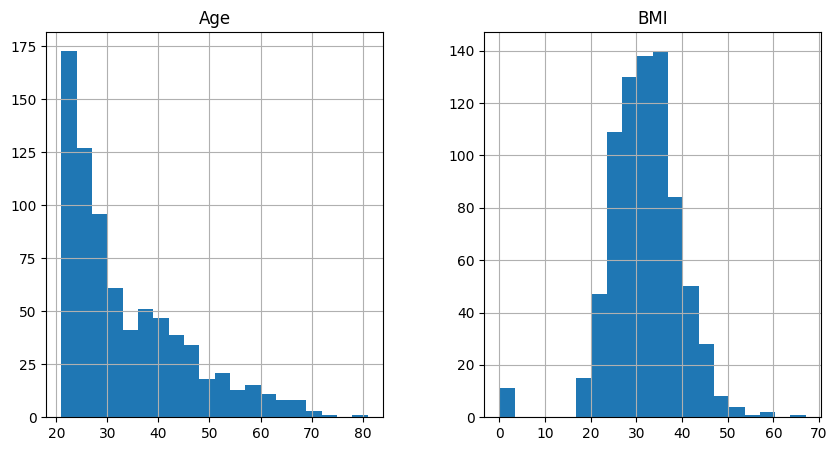

In [13]:
# Create histograms for numerical columns (e.g., 'Age' and 'BMI')
df[['Age', 'BMI']].hist(bins=20, figsize=(10, 5))
plt.show()


The most common age group is 22-24 years old, with 172 patients in this group. There are also a significant number of patients in the 25-27 year old group  and the 27-30 year old group.

The most common BMI group is 30-38 in this group. There are also a significant number of patients in the 25-30 BMI group.

Both figures show that the data is not normally distributed. The age distribution is skewed to the right, meaning that there are more younger patients than older patients. The BMI distribution is also skewed to the right, meaning that there are more patients with a lower BMI than patients with a higher BMI.



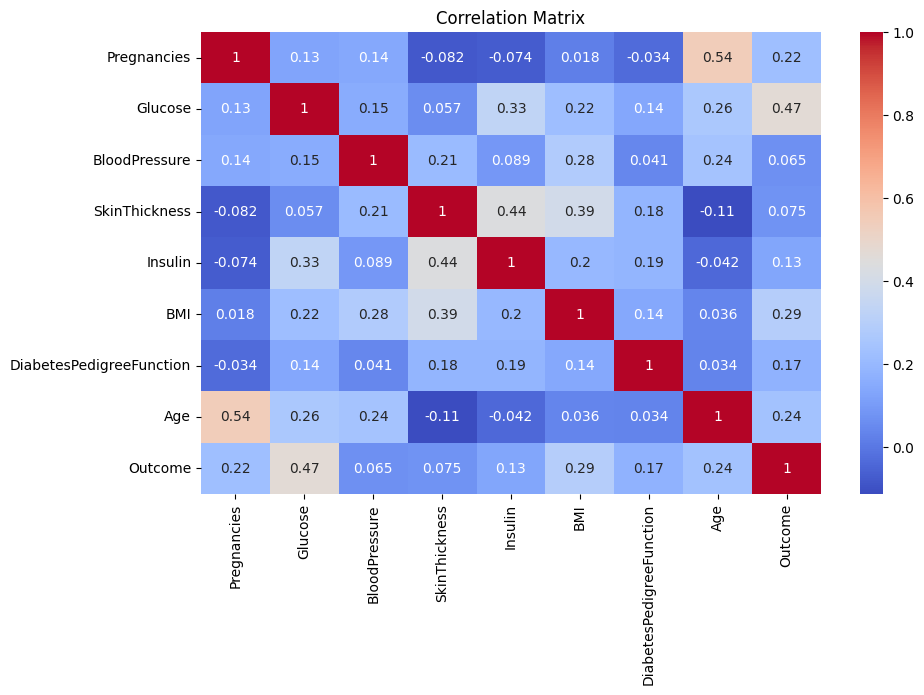

In [14]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


The image shows that the correlation coefficients between the variables in the Pima Indian diabetes dataset are all mostly positive, but most of them are weak. The strongest correlation is between the number of pregnancies and the age (0.54), followed by the correlation between the glucose level and the outcome (0.47). The correlation between the insulin and skin thickness is also relatively strong (0.44).

The weak correlations between the variables suggest that there is no single variable that is strongly correlated with diabetes. This means that it is necessary to consider multiple variables when trying to predict diabetes.

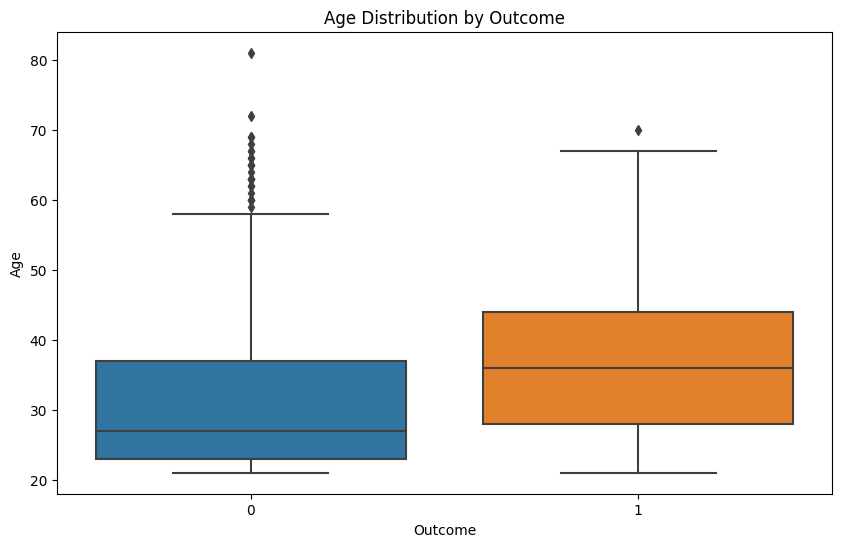

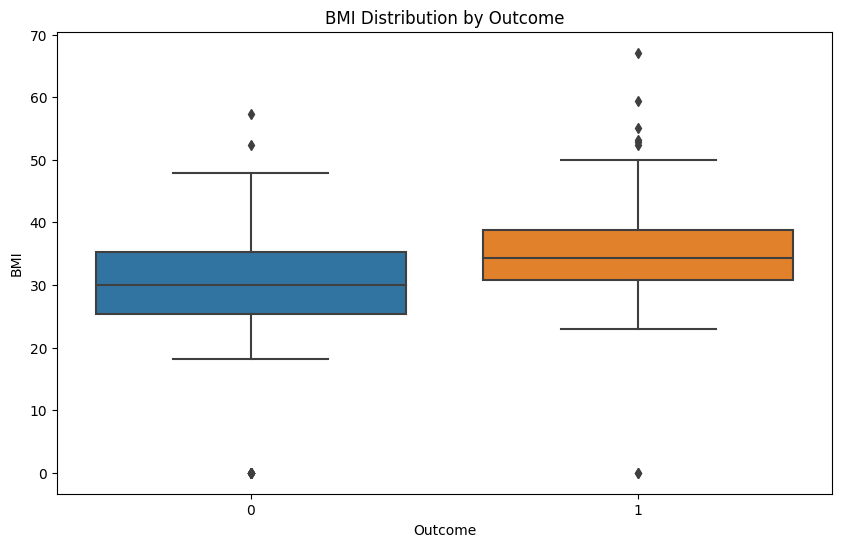

In [15]:
# Create box plots to compare 'Age' and 'BMI' by 'Outcome'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title('Age Distribution by Outcome')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI Distribution by Outcome')
plt.show()


# Classification Analysis: Machine Learning

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into train and test sets
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)


Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In summary, the classification model achieved an accuracy of 75%, indicating that it correctly predicted outcomes for 75% of the cases. However, there's room for improvement in precision and recall, particularly for the "Diabetic" class.